# Linear Regression Model

In [38]:
# Installations
# !pip install keras
# !pip install tensorflow
# !pip install sklearn --upgrade
# !pip install joblib

In [39]:
import warnings
warnings.simplefilter('ignore')

# Load dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the same starting seed number for numpy.random so the results are reproducible
from numpy.random import seed
seed(42)

## Basic Data Cleaning

In [40]:
# Read and clean the data
# filepath = os.path.join('..','resources','WDI_csv','WDIData.csv')
filepath = os.path.join('..','resources','new_df.csv')
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value,HDI
0,0,South Asia,SAS,"Population, total",SP.POP.TOTL,1990,1.133495e+09,0.441
1,1,South Asia,SAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,5.814480e+01,0.441
2,2,South Asia,SAS,GDP (current US$),NY.GDP.MKTP.CD,1990,4.072270e+11,0.441
3,3,South Asia,SAS,"Employers, total (% of total employment) (mode...",SL.EMP.MPYR.ZS,1990,NaN,0.441
4,4,South Asia,SAS,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,1990,2.691710e+01,0.441


In [41]:
# Grab only the rows belonging to the specified indicator
# indicator = "GNI growth (annual %)"
# indicator = "Population, total"
indicator = "Life expectancy at birth, total (years)"
# indicator = "GDP (current US$)"
# indicator = "Employers, total (% of total employment) (modeled ILO estimate)"
# indicator = "Agriculture, forestry, and fishing, value added (% of GDP)"

indicator_df = df.loc[df["Indicator Name"] == indicator, :]
print(indicator_df.shape)

# Drop the null rows
indicator_df = indicator_df.dropna()
indicator_df.drop(indicator_df[indicator_df.HDI == ".."].index, inplace=True)
indicator_df = indicator_df.sort_values("Value")
print(indicator_df.shape)

# Test Agriculture
# indicator_df.drop(indicator_df[indicator_df.Value > 50].index, inplace=True)
# print(indicator_df.shape)
# Score 0.68466...

indicator_df.head()

(4988, 8)
(4168, 8)


,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value,HDI
3231,3231,Rwanda,RWA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1993,26.172,0.195
2371,2371,Rwanda,RWA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1992,26.691,0.2
4091,4091,Rwanda,RWA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1994,27.738,0.189
1511,1511,Rwanda,RWA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1991,29.248,0.218
4951,4951,Rwanda,RWA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1995,31.037,0.228


In [42]:
# Flatten the data into arrays
X = np.array(indicator_df["Value"])
# X = indicator_df["Value"]

y = np.array(indicator_df["HDI"].astype('float'))
# y = indicator_df["HDI"].astype('float')

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

(4168, 1)
(4168, 1)


## Plot the Data

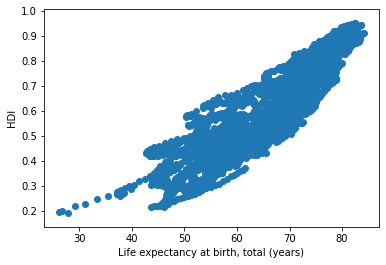

In [43]:
fig, ax = plt.subplots()
ax.scatter(X, y)
plt.xlabel(indicator)
plt.ylabel("HDI")
plt.show()

## Data Preprocessing for ML

In [44]:
# Split into Test and Train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
# Scale the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [46]:
# Transform the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Creating the Model

### Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Create the model using LinearRegression
linear = LinearRegression()

# Train the model
linear.fit(X_train_scaled, y_train_scaled)

# Use our model to make predictions
predictions = linear.predict(X_test_scaled)

# Score the model
# training_score = model.score(X_train_scaled, y_train_scaled)
# testing_score = model.score(X_test_scaled, y_test_scaled)
r2 = linear.score(X_test_scaled, y_test_scaled)
mse = mean_squared_error(y_test_scaled, predictions)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Linear Coefficient: {linear.coef_[0][0]}")
print(f"y-Axis Intercept: {linear.intercept_[0]}")

R2 Score: 0.8316496124036281
Mean Squared Error (MSE): 0.16834852027517616
Linear Coefficient: 0.9149631150208571
y-Axis Intercept: 6.885552301810692e-16


### Plot the Model

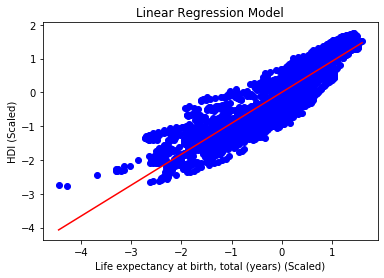

In [49]:
# Plot the model
x_min = np.array([[X_train_scaled.min()]])
x_max = np.array([[X_train_scaled.max()]])
y_min = linear.predict(x_min)
y_max = linear.predict(x_max)
plt.scatter(X_train_scaled, y_train_scaled, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("Linear Regression Model")
plt.xlabel(f"{indicator} (Scaled)")
plt.ylabel("HDI (Scaled)")
plt.show()

### Predicting HDI value

In [53]:
feed_value = 65
X_scaled = X_scaler.transform([[feed_value]])
y_scaled = linear.predict(X_scaled)
predicted_y = y_scaler.inverse_transform(y_scaled)
predicted_HDI = predicted_y[0][0]
predicted_HDI
print(f"If a country's {indicator} is {feed_value}, we expect HDI to be approximately {predicted_HDI}.")

If a country's Life expectancy at birth, total (years) is 65, we expect HDI to be approximately 0.5962739563342725.


### Plot the Residuals

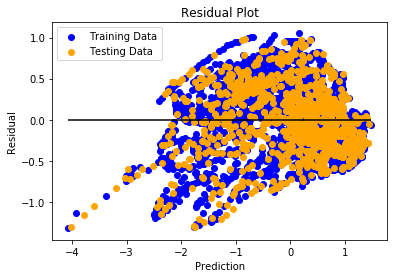

In [51]:
# Plot the residuals
y_train_predict = linear.predict(X_train_scaled)
y_test_predict = linear.predict(X_test_scaled)
y_train_residual = linear.predict(X_train_scaled) - y_train_scaled
y_test_residual = linear.predict(X_test_scaled) - y_test_scaled

plt.scatter(y_train_predict, y_train_residual, c="blue", label="Training Data")
plt.scatter(y_test_predict, y_test_residual, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train_predict.min(), xmax=y_train_predict.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.show()